In [4]:
import csv
import pandas as pd
import nltk
from nltk import FreqDist,ngrams
from nltk.corpus import stopwords
import string
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from datetime import datetime

In [34]:
# import sys
# # reload(sys)
# sys.setdefaultencoding("ISO-8859-1")

In [2]:
allbodies = pd.read_csv('C:/Users/bridge/deda/regrisk/NLPnML/df02 - without867.csv',encoding="ISO-8859-1")

In [3]:
allbodies['comments'].replace(['[]'], [0], inplace=True)

In [169]:
allbodies.head(20)

,title,author,dt,views,shares,body,comments,alltags
0,SEC Chairman Jay Clayton Says Bitcoin Not a Se...,Molly Jane Zuckerman,6/7/2018 16:05,21383,422,"Jay Clayton, the chair of the US Securities an...",5,#Bitcoin Regulation #Ethereum News #SE...
1,Japan's Financial Watchdog Rejects Crypto Exch...,Marie Huillet,6/7/2018 13:15,8146,158,Japans Financial Services Agency (FSA) has ba...,0,#Bitcoin Regulation #Japan #Cryptocurr...
2,LexisNexis Partners With Australian Crypto Exc...,Helen Partz,6/5/2018 13:45,18990,205,Risk management giant LexisNexis has partnered...,0,#Bitcoin Regulation #Cryptocurrency Excha...
3,Russian Court Annuls Previous Decision to Bloc...,Helen Partz,6/5/2018 12:15,10605,211,"The City Court of St. Petersburg, Russia has o...",0,#Bitcoin Regulation #Russia #Cryptocur...
4,Former SEC Chair Represents Ripple in Lawsuit ...,Ana Alexandre,6/5/2018 12:56,14094,172,Fintech company Ripple Labs has employed Debev...,1,#Bitcoin Regulation #Altcoin News #Rip...
5,SEC Names New Senior Advisor to Oversee Crypto...,Marie Huillet,6/5/2018 20:05,9216,192,The U.S. Securities and Exchange Commission (S...,0,#Bitcoin Regulation #SEC #Cryptocurren...
6,Former US Federal Prosecutor at Money20/20: A...,Marie Huillet,6/5/2018 6:19,7957,321,Former U.S. Federal Prosecutor Mary Beth Bucha...,0,#Bitcoin Regulation #Cryptocurrencies ...
7,Spain Introduces Innovation-Aimed Crypto Regul...,Stephen O'Neal,6/5/2018 5:45,13978,285,"On May 30, the Spanish Congress unanimously su...",8,#Bitcoin Regulation #Spain #Fintech ...
8,New York State Legislature Proposes Creation o...,Ana Alexandre,6/4/2018 13:20,22454,263,The banks committee of the New York state legi...,1,#Bitcoin Regulation #Cryptocurrencies ...
9,Japan: Financial Watchdog Probes Crypto Exchan...,Marie Huillet,6/2/2018 8:27,17063,165,Japans Financial Services Agency (FSA) has is...,11,#Bitcoin Regulation #Japan #Crypto Exc...


In [4]:
def ngram_list(file,n):
    f = open(file,'rU')
    raw = f.read()
    raw = raw.replace('\n',' ')
    #raw = raw.decode('utf8')
    #raw = raw.decode("utf-8", 'ignore')
    ngramz = ngrams(raw.split(),n)
    return ngramz

In [5]:
def IsNotNull(value):
        return value is not None and len(value) > 0

In [50]:
mypath = 'C:/Users/bridge/deda/regrisk/NLPnML/ct/' #path where files are located
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
labels = ('file', 'Pbody', 'Nbody', 'Tbody', 'SENTIMENTbody')

In [ ]:
# now check LM

In [46]:
dict_p = []
f = open('lm_positive.txt', 'r')  # 354 words
for line in f:
    t = line.strip().lower()
    if IsNotNull(t):
        dict_p.append(t)
f.close

dict_n = []
f = open('lm_negative.txt', 'r')  # 2329 words
for line in f:
	t = line.strip().lower()
	if IsNotNull(t):
		dict_n.append(t)
f.close

<function TextIOWrapper.close()>

In [47]:
%%time
totallist = []
rowlist = []
qa = 0
qb = 0
counti = 0

for i in onlyfiles:
    if i.endswith('.txt'):
        # get code
        j = i.replace('.txt','')
        # string filename
        file = mypath + str(i)

        f = open(file,'rU')
        raw = f.read()
        table = str.maketrans("","",string.punctuation)
        raw = [w.translate(table) for w in raw]
        raw = ''.join(raw)
        raw = raw.replace('\n','')
        raw = raw.replace(' ','')
        qa = 0
        qb = 0
        for word in dict_p:
            if word in raw:
                qa += 1
        for word in dict_n:
            if word in raw:
                qb += 1
        qc = qa - qb

        if qc > 0:
            sentiment = 'POSITIVE'
        elif qc == 0:
            sentiment = 'NEUTRAL'
        else:
            sentiment = 'NEGATIVE'

        rowlist.append(i)
        rowlist.append(qa)
        rowlist.append(qb)
        rowlist.append(qc)
        rowlist.append(sentiment)

        counti += 1
        totallist.append(rowlist)

        rowlist = []

    else:
        pass

C:\Users\bridge\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning:

'U' mode is deprecated



Wall time: 9.16 s


In [52]:
df_LM = pd.DataFrame.from_records(totallist, columns = labels)
df_LM['SENTIMENTbody'].value_counts()

NEGATIVE    860
POSITIVE     59
NEUTRAL      20
Name: SENTIMENTbody, dtype: int64

In [216]:
# df_LM.to_csv("df_LM.csv", index=None)

In [53]:
df_LM.head()

,file,Pbody,Nbody,Tbody,SENTIMENTbody
0,0article.txt,2,12,-10,NEGATIVE
1,100article.txt,6,8,-2,NEGATIVE
2,101article.txt,6,9,-3,NEGATIVE
3,102article.txt,9,6,3,POSITIVE
4,103article.txt,8,24,-16,NEGATIVE


In [60]:
# building the df
df_LM['srno'] = df_LM['file'].str.extract('(\d+)', expand=True)
df_LM['srno']=pd.to_numeric(df_LM['srno'])
df_LM = df_LM.sort_values('srno')
allbodies['srno']=allbodies.index
dfwithsent = pd.merge(allbodies, df_LM, on=['srno'])
del(dfwithsent['file'])
dfwithsent['date'] = pd.to_datetime(dfwithsent['dt'])
del(dfwithsent['dt'])
dfwithsent = dfwithsent.sort_values('date')

In [61]:
dfwithsent.head()

,title,author,views,shares,body,comments,alltags,srno,Pbody,Nbody,Tbody,SENTIMENTbody,date
391,'Bitcoin is a currency': Federal judge says vi...,Cecilia Grigolia,94,0,"As it is known, Bitcoin is a digital currency,...",0,#Bitcoin News #Bitcoin Regulation #USA,391,6,23,-17,NEGATIVE,2013-08-08 17:15:00
390,NY regulator may break down on Bitcoin,Cecilia Grigolia,106,0,New York financial regulators are concerned ab...,0,#Bitcoin Regulation #New York #USA ...,390,9,24,-15,NEGATIVE,2013-08-12 13:05:00
798,Senate pressing regulators on Bitcoin risks an...,Eric Barrier,45,0,A Senate homeland security committee seeks exp...,0,#Bitcoin News #Bitcoin Regulation #USA,798,7,18,-11,NEGATIVE,2013-08-13 10:45:00
642,Mr. Satoshi goes to Washington,Eric Barrier,36,0,FinCEN has called a meeting with a few federal...,0,#Bitcoin Regulation #FinCEN #Washington,642,1,10,-9,NEGATIVE,2013-08-20 13:10:00
641,Bitcoin: What has Washington interested,Eric Barrier,38,0,We have enough examples now to know that Bitco...,0,#Bitcoin News #Bitcoin Regulation #USA...,641,6,15,-9,NEGATIVE,2013-08-22 14:40:00


In [62]:
# dfwithsent.groupby('author')['NET'].mean()

In [68]:
%%time

# get sentiment score for title of the article

totallist = []
rowlist = []
qa = 0
qb = 0
counti = 0

for i in allbodies['title']:
        raw=i
        table = str.maketrans("","",string.punctuation)
        raw = [w.translate(table) for w in raw]
        raw = ''.join(raw)
        raw = raw.replace('\n','')
        raw = raw.replace(' ','')
        qa = 0
        qb = 0
        for word in dict_p:
            if word in raw:
                qa += 1
        for word in dict_n:
            if word in raw:
                qb += 1
        qc = qa - qb
        if qc > 0:
            sentiment = 'POSITIVE'
        elif qc == 0:
            sentiment = 'NEUTRAL'
        else:
            sentiment = 'NEGATIVE'

        rowlist.append(i)
        rowlist.append(qa)
        rowlist.append(qb)
        rowlist.append(qc)
        rowlist.append(sentiment)

        counti += 1
        totallist.append(rowlist)

        rowlist = []

Wall time: 518 ms


In [69]:
dftitle = pd.DataFrame.from_records(totallist, columns = ['title','P-title','N-title','T-title','SENTIMENT-title'])
dftitle['SENTIMENT-title'].value_counts()

NEUTRAL     686
NEGATIVE    206
POSITIVE     47
Name: SENTIMENT-title, dtype: int64

In [76]:
dfwithsent2 = pd.merge(dfwithsent, dftitle, on=['title'])
del(dfwithsent2['body'],dfwithsent2['author'],dfwithsent2['alltags'],dfwithsent2['views'],dfwithsent2['shares'],
    dfwithsent2['comments'])
dfsent = dfwithsent2

In [77]:
dfsent.head()

,title,srno,Pbody,Nbody,Tbody,SENTIMENTbody,date,P-title,N-title,T-title,SENTIMENT-title
0,'Bitcoin is a currency': Federal judge says vi...,391,6,23,-17,NEGATIVE,2013-08-08 17:15:00,0,0,0,NEUTRAL
1,NY regulator may break down on Bitcoin,390,9,24,-15,NEGATIVE,2013-08-12 13:05:00,0,2,-2,NEGATIVE
2,Senate pressing regulators on Bitcoin risks an...,798,7,18,-11,NEGATIVE,2013-08-13 10:45:00,0,1,-1,NEGATIVE
3,Mr. Satoshi goes to Washington,642,1,10,-9,NEGATIVE,2013-08-20 13:10:00,0,0,0,NEUTRAL
4,Bitcoin: What has Washington interested,641,6,15,-9,NEGATIVE,2013-08-22 14:40:00,0,0,0,NEUTRAL


In [80]:
dfsent['T-title'].describe()

count    939.000000
mean      -0.191693
std        0.659113
min       -3.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: T-title, dtype: float64

In [81]:
dfsent[dfsent['T-title']==-3]

,title,srno,Pbody,Nbody,Tbody,SENTIMENTbody,date,P-title,N-title,T-title,SENTIMENT-title
60,Government's warnings won't stop Vietnam from ...,851,11,31,-20,NEGATIVE,2014-08-06 16:52:00,0,3,-3,NEGATIVE
94,Hong Kong Announces Bitcoin will Remain Deregu...,820,5,13,-8,NEGATIVE,2015-03-25 12:40:00,0,3,-3,NEGATIVE
157,Coinkite Is Closing Down Its Web Wallet Citing...,421,8,16,-8,NEGATIVE,2016-04-03 12:29:00,0,3,-3,NEGATIVE


In [82]:
dfsent[dfsent['T-title']==2]

,title,srno,Pbody,Nbody,Tbody,SENTIMENTbody,date,P-title,N-title,T-title,SENTIMENT-title
45,Argentinean Central Bank Warns Against Using B...,862,5,17,-12,NEGATIVE,2014-05-29 14:30:00,2,0,2,POSITIVE
133,The Gox Effect: Japan Slowly Turning Against B...,921,11,37,-26,NEGATIVE,2015-08-27 08:36:00,2,0,2,POSITIVE
249,Indias Central Bank Cracks Down on Bitcoin Ag...,883,5,27,-22,NEGATIVE,2017-02-07 12:14:00,2,0,2,POSITIVE
284,Why the European Union is Against Anonymous Di...,719,3,15,-12,NEGATIVE,2017-03-26 12:33:00,2,0,2,POSITIVE
330,How Switzerland Reinvented Itself As Cryptocur...,919,11,5,6,POSITIVE,2017-07-06 13:45:00,2,0,2,POSITIVE
337,Egyptian Governments Hardline Stand Against B...,464,6,13,-7,NEGATIVE,2017-07-17 11:50:00,2,0,2,POSITIVE
371,Tips for Investors: How to Protect Yourselves ...,368,4,15,-11,NEGATIVE,2017-08-30 17:40:00,2,0,2,POSITIVE
401,Russia Central Bank Categorically Against Regu...,113,4,9,-5,NEGATIVE,2017-09-14 14:45:00,2,0,2,POSITIVE
477,Indonesian Central Bank Continues Campaign Aga...,202,3,10,-7,NEGATIVE,2017-10-27 07:25:00,2,0,2,POSITIVE
514,UK Financial Authority Warns Investors Against...,180,5,19,-14,NEGATIVE,2017-11-15 11:54:00,2,0,2,POSITIVE


In [5]:
import cufflinks as cf
print(cf.__version__)

0.8.2


In [399]:
fig1 = sentprice_sub.iplot(columns=['LTC', 'BTC'], asFigure=True)
fig2 = sentprice_sub.iplot(columns=['NET'], kind='bar', secondary_y=['NET'], asFigure=True)
fig2['data'].extend(fig1['data'])
py.offline.plot(fig2)

'file://C:\\Users\\bridge\\deda\\regrisk\\NLPnML\\temp-plot.html'

In [25]:
dfplot = dfwithsent

In [319]:
del(dfplot['dt'])

In [324]:
dfplot = dfplot.sort_values('date')

In [325]:
dfplot.head()

,NET,date
391,-17,2013-08-08 17:15:00
390,-15,2013-08-12 13:05:00
798,-11,2013-08-13 10:45:00
642,-9,2013-08-20 13:10:00
641,-9,2013-08-22 14:40:00


In [337]:
dfplot['just_date'] = dfplot['date'].dt.date

In [338]:
dfplot.head()

,NET,date,just_date
391,-17,2013-08-08 17:15:00,2013-08-08
390,-15,2013-08-12 13:05:00,2013-08-12
798,-11,2013-08-13 10:45:00,2013-08-13
642,-9,2013-08-20 13:10:00,2013-08-20
641,-9,2013-08-22 14:40:00,2013-08-22


In [339]:
del(dfplot['date'])

In [348]:
uniqdates = dfplot.groupby('just_date', as_index=False)['NET'].sum()

In [349]:
uniqdates.shape

(537, 2)

In [350]:
type(uniqdates)

pandas.core.frame.DataFrame

In [351]:
uniqdates.sort_values('just_date')

,just_date,NET
0,2013-08-08,-17
1,2013-08-12,-15
2,2013-08-13,-11
3,2013-08-20,-9
4,2013-08-22,-9
5,2013-08-27,-21
6,2013-09-05,-14
7,2013-09-28,-16
8,2013-10-29,-3
9,2013-11-03,-19


In [362]:
# data = [go.Scatter(x=uniqdates['just_date'], y=uniqdates['NET'])]

In [360]:
# py.offline.plot(data)

In [358]:
data = [go.Bar(x=uniqdates['just_date'], y=uniqdates['NET'])]

In [359]:
py.offline.plot(data)

'file://C:\\Users\\bridge\\deda\\regrisk\\NLPnML\\temp-plot.html'

In [372]:
uniqdates.to_csv('uniqdates.csv', index=None)

In [375]:
uniqdates.index = uniqdates['just_date']

In [376]:
pricesent = uniqdates
pricesent.head()

,just_date,NET
just_date,,
2013-08-08,2013-08-08,-17
2013-08-12,2013-08-12,-15
2013-08-13,2013-08-13,-11
2013-08-20,2013-08-20,-9
2013-08-22,2013-08-22,-9


In [377]:
del(pricesent['just_date'])

In [386]:
sentprice = pricesent.join(combined_df, how='outer')

In [387]:
sentprice.head()

,NET,ETH,LTC,XRP,ETC,STR,DASH,SC,XMR,XEM,BTC
2013-08-08,-17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-12,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-13,-11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-20,-9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-22,-9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
sentprice_sub = sentprice.loc['2015-01-01':'2018-05-31']

C:\Users\bridge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [391]:
sentprice_sub['NET'].fillna(0, inplace=True)

In [392]:
sentprice_sub.head()

,NET,ETH,LTC,XRP,ETC,STR,DASH,SC,XMR,XEM,BTC
2015-01-01,0.0,NaN,2.711091,0.024008,NaN,0.005474,1.978678,NaN,0.449231,NaN,316.768392
2015-01-02,-7.0,NaN,2.685418,0.024511,NaN,0.005536,1.974292,NaN,0.455994,NaN,315.785146
2015-01-03,0.0,NaN,2.389670,0.022297,NaN,0.005117,1.818238,NaN,0.473959,NaN,301.512433
2015-01-04,0.0,NaN,2.079496,0.018999,NaN,0.004521,1.705425,NaN,0.424769,NaN,276.706053
2015-01-05,0.0,NaN,2.076988,0.020051,NaN,0.004870,1.650610,NaN,0.413943,NaN,271.139494


In [390]:
sentprice_sub.shape

(1247, 11)

In [1]:
import cufflinks as cf
print(cf.__version__)

0.8.2


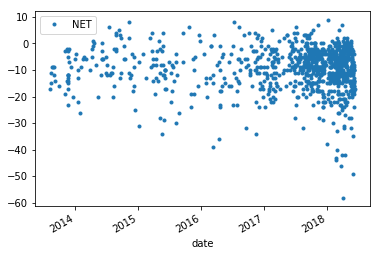

In [300]:
dfwithsent.plot(x='date',y='NET', style='.')

In [296]:
dfwithsent['date'].size

939

In [294]:
data = [go.Scatter(x=dfwithsent['date'], y=dfwithsent['NET'])]

In [295]:
py.offline.plot(data)

'file://C:\\Users\\bridge\\deda\\regrisk\\NLPnML\\temp-plot.html'

In [128]:
import os
import numpy as np
import pandas as pd
import pickle
import quandl
from datetime import datetime

In [129]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [130]:
def get_quandl_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [131]:
# Pull Kraken BTC price exchange data
btc_usd_price_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

Cached BCHARTS/KRAKENUSD at BCHARTS-KRAKENUSD.pkl


In [132]:
btc_usd_price_kraken.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [133]:
# Chart the BTC pricing data
btc_trace = go.Scatter(x=btc_usd_price_kraken.index, y=btc_usd_price_kraken['Weighted Price'])
py.iplot([btc_trace])

In [134]:
# Pull pricing data for 3 more BTC exchanges
exchanges = ['COINBASE','BITSTAMP','ITBIT']

exchange_data = {}

exchange_data['KRAKEN'] = btc_usd_price_kraken

for exchange in exchanges:
    exchange_code = 'BCHARTS/{}USD'.format(exchange)
    btc_exchange_df = get_quandl_data(exchange_code)
    exchange_data[exchange] = btc_exchange_df

Cached BCHARTS/COINBASEUSD at BCHARTS-COINBASEUSD.pkl
Cached BCHARTS/BITSTAMPUSD at BCHARTS-BITSTAMPUSD.pkl
Cached BCHARTS/ITBITUSD at BCHARTS-ITBITUSD.pkl


In [135]:
def merge_dfs_on_column(dataframes, labels, col):
    '''Merge a single column of each dataframe into a new combined dataframe'''
    series_dict = {}
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

In [136]:
# Merge the BTC price dataseries' into a single dataframe
btc_usd_datasets = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Weighted Price')

In [137]:
btc_usd_datasets.tail()

,KRAKEN,COINBASE,BITSTAMP,ITBIT
Date,,,,
2018-06-22,6253.716124,6241.882496,6283.202163,6287.060492
2018-06-23,6133.505460,6133.479208,6137.488639,6121.887751
2018-06-24,5990.530329,6020.179715,5987.551809,6008.756939
2018-06-25,6209.353804,6212.208982,6204.806754,6197.104192
2018-06-26,6194.146349,6191.605741,6195.127015,6195.236538


In [138]:
def df_scatter(df, title, seperate_y_axis=False, y_axis_label='', scale='linear', initial_hide=False):
    '''Generate a scatter plot of the entire dataframe'''
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))
    
    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels= not seperate_y_axis,
            type=scale
        )
    )
    
    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale )
    
    visibility = 'visible'
    if initial_hide:
        visibility = 'legendonly'
        
    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index, 
            y=series, 
            name=label_arr[index],
            visible=visibility
        )
        
        # Add seperate axis for the series
        if seperate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config    
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    py.iplot(fig)

In [139]:
# Plot all of the BTC exchange prices
df_scatter(btc_usd_datasets, 'Bitcoin Price (USD) By Exchange')

In [140]:
# Remove "0" values
btc_usd_datasets.replace(0, np.nan, inplace=True)

In [141]:
# Plot the revised dataframe
df_scatter(btc_usd_datasets, 'Bitcoin Price (USD) By Exchange')

In [142]:
# Calculate the average BTC price as a new column
btc_usd_datasets['avg_btc_price_usd'] = btc_usd_datasets.mean(axis=1)

In [3]:
# Plot the average BTC price
btc_trace = go.Scatter(x=btc_usd_datasets.index, y=btc_usd_datasets['avg_btc_price_usd'])
py.iplot([btc_trace])

NameError: name 'go' is not defined

In [144]:
def get_json_data(json_url, cache_path):
    '''Download and cache JSON data, return as a dataframe.'''
    try:        
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(json_url))
    except (OSError, IOError) as e:
        print('Downloading {}'.format(json_url))
        df = pd.read_json(json_url)
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(json_url, cache_path))
    return df

In [145]:
base_polo_url = 'https://poloniex.com/public?command=returnChartData&currencyPair={}&start={}&end={}&period={}'
start_date = datetime.strptime('2015-01-01', '%Y-%m-%d') # get data from the start of 2015
end_date = datetime.now() # up until today
pediod = 86400 # pull daily data (86,400 seconds per day)

def get_crypto_data(poloniex_pair):
    '''Retrieve cryptocurrency data from poloniex'''
    json_url = base_polo_url.format(poloniex_pair, start_date.timestamp(), end_date.timestamp(), pediod)
    data_df = get_json_data(json_url, poloniex_pair)
    data_df = data_df.set_index('date')
    return data_df

In [146]:
altcoins = ['ETH','LTC','XRP','ETC','STR','DASH','SC','XMR','XEM']

altcoin_data = {}
for altcoin in altcoins:
    coinpair = 'BTC_{}'.format(altcoin)
    crypto_price_df = get_crypto_data(coinpair)
    altcoin_data[altcoin] = crypto_price_df

Cached https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETH&start=1420066800.0&end=1530088913.548052&period=86400 at BTC_ETH
Cached https://poloniex.com/public?command=returnChartData&currencyPair=BTC_LTC&start=1420066800.0&end=1530088913.548052&period=86400 at BTC_LTC
Cached https://poloniex.com/public?command=returnChartData&currencyPair=BTC_XRP&start=1420066800.0&end=1530088913.548052&period=86400 at BTC_XRP
Cached https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETC&start=1420066800.0&end=1530088913.548052&period=86400 at BTC_ETC
Cached https://poloniex.com/public?command=returnChartData&currencyPair=BTC_STR&start=1420066800.0&end=1530088913.548052&period=86400 at BTC_STR
Cached https://poloniex.com/public?command=returnChartData&currencyPair=BTC_DASH&start=1420066800.0&end=1530088913.548052&period=86400 at BTC_DASH
Cached https://poloniex.com/public?command=returnChartData&currencyPair=BTC_SC&start=1420066800.0&end=1530088913.548052&period=8

In [147]:
altcoin_data['ETH'].tail()

,close,high,low,open,quoteVolume,volume,weightedAverage
date,,,,,,,
2018-06-23,0.076870,0.077444,0.075766,0.076441,4150.216438,318.866611,0.076831
2018-06-24,0.074020,0.077118,0.072586,0.076999,18598.731385,1381.553953,0.074282
2018-06-25,0.073371,0.075707,0.072871,0.074020,11126.854643,823.313714,0.073993
2018-06-26,0.070787,0.073714,0.070768,0.073371,20626.436538,1482.493689,0.071873
2018-06-27,0.071525,0.071675,0.070550,0.070782,6093.932002,433.120426,0.071074


In [148]:
# Calculate USD Price as a new column in each altcoin dataframe
for altcoin in altcoin_data.keys():
    altcoin_data[altcoin]['price_usd'] =  altcoin_data[altcoin]['weightedAverage'] * btc_usd_datasets['avg_btc_price_usd']

In [149]:
# Merge USD price of each altcoin into single dataframe 
combined_df = merge_dfs_on_column(list(altcoin_data.values()), list(altcoin_data.keys()), 'price_usd')

In [150]:
# Add BTC price to the dataframe
combined_df['BTC'] = btc_usd_datasets['avg_btc_price_usd']

In [374]:
combined_df.to_csv('combined_df.csv')

In [158]:
combined_df.tail()

,ETH,LTC,XRP,ETC,STR,DASH,SC,XMR,XEM,BTC
date,,,,,,,,,,
2018-06-23,471.098174,82.962930,0.486603,14.737277,0.200074,244.898597,0.011037,115.018945,0.163530,6131.590265
2018-06-24,445.823303,78.399661,0.465676,14.047347,0.186715,235.117720,0.010023,116.195831,0.150644,6001.754698
2018-06-25,459.193243,81.289305,0.476300,15.466638,0.194616,240.927265,0.010488,125.884304,0.156016,6205.868433
2018-06-26,445.186351,79.853545,0.469569,15.477578,0.189785,234.148106,0.010282,125.378171,0.156647,6194.028911
2018-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
# Chart all of the altocoin prices
df_scatter(combined_df, 'Cryptocurrency Prices (USD)', seperate_y_axis=False, y_axis_label='Coin Value (USD)', scale='log')

In [152]:
# Calculate the pearson correlation coefficients for cryptocurrencies in 2016
combined_df_2016 = combined_df[combined_df.index.year == 2016]
combined_df_2016.pct_change().corr(method='pearson')

,ETH,LTC,XRP,ETC,STR,DASH,SC,XMR,XEM,BTC
ETH,1.000000,-0.064652,0.085630,-0.181991,0.035093,0.122695,0.169642,0.087216,0.043205,-0.006502
LTC,-0.064652,1.000000,0.053712,-0.131079,0.113523,-0.012194,0.012253,0.129475,0.160667,0.750174
XRP,0.085630,0.053712,1.000000,-0.054095,0.320116,0.088657,0.021098,0.027649,0.101326,0.044161
ETC,-0.181991,-0.131079,-0.054095,1.000000,-0.102654,0.003992,-0.008066,-0.105898,-0.080938,-0.170538
STR,0.035093,0.113523,0.320116,-0.102654,1.000000,0.058083,0.143252,0.027998,0.225132,0.079075
DASH,0.122695,-0.012194,0.088657,0.003992,0.058083,1.000000,0.026602,0.121537,0.014571,-0.014040
SC,0.169642,0.012253,0.021098,-0.008066,0.143252,0.026602,1.000000,0.047910,0.106153,0.035116
XMR,0.087216,0.129475,0.027649,-0.105898,0.027998,0.121537,0.047910,1.000000,0.016438,0.127520
XEM,0.043205,0.160667,0.101326,-0.080938,0.225132,0.014571,0.106153,0.016438,1.000000,0.227674
BTC,-0.006502,0.750174,0.044161,-0.170538,0.079075,-0.014040,0.035116,0.127520,0.227674,1.000000


In [153]:
def correlation_heatmap(df, title, absolute_bounds=True):
    '''Plot a correlation heatmap for the entire dataframe'''
    heatmap = go.Heatmap(
        z=df.corr(method='pearson').as_matrix(),
        x=df.columns,
        y=df.columns,
        colorbar=dict(title='Pearson Coefficient'),
    )
    
    layout = go.Layout(title=title)
    
    if absolute_bounds:
        heatmap['zmax'] = 1.0
        heatmap['zmin'] = -1.0
        
    fig = go.Figure(data=[heatmap], layout=layout)
    py.iplot(fig)

In [154]:
correlation_heatmap(combined_df_2016.pct_change(), "Cryptocurrency Correlations in 2016")

C:\Users\bridge\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [155]:
combined_df_2017 = combined_df[combined_df.index.year == 2017]
combined_df_2017.pct_change().corr(method='pearson')

,ETH,LTC,XRP,ETC,STR,DASH,SC,XMR,XEM,BTC
ETH,1.000000,0.437609,0.212350,0.601437,0.259399,0.506911,0.373078,0.554632,0.399200,0.410771
LTC,0.437609,1.000000,0.323905,0.482062,0.307589,0.340153,0.339144,0.437204,0.379088,0.420645
XRP,0.212350,0.323905,1.000000,0.114780,0.509828,0.091146,0.243872,0.226636,0.268168,0.131469
ETC,0.601437,0.482062,0.114780,1.000000,0.210387,0.387555,0.298406,0.447398,0.321852,0.416562
STR,0.259399,0.307589,0.509828,0.210387,1.000000,0.183038,0.402966,0.327488,0.339502,0.230957
DASH,0.506911,0.340153,0.091146,0.387555,0.183038,1.000000,0.291424,0.498418,0.325968,0.307095
SC,0.373078,0.339144,0.243872,0.298406,0.402966,0.291424,1.000000,0.378644,0.331350,0.325318
XMR,0.554632,0.437204,0.226636,0.447398,0.327488,0.498418,0.378644,1.000000,0.336076,0.409183
XEM,0.399200,0.379088,0.268168,0.321852,0.339502,0.325968,0.331350,0.336076,1.000000,0.329431
BTC,0.410771,0.420645,0.131469,0.416562,0.230957,0.307095,0.325318,0.409183,0.329431,1.000000


In [156]:
correlation_heatmap(combined_df_2017.pct_change(), "Cryptocurrency Correlations in 2017")

C:\Users\bridge\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

